In [23]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [25]:
df = pd.read_csv('placement_data.csv', usecols = ['cgpa','iq','placement'])

In [27]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [29]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,2], random_state = 42, test_size = 0.2)

In [33]:
# x_train.head()

In [35]:
# y_train.head()

Text(0.5, 1.0, 'cgpa QQ plot')

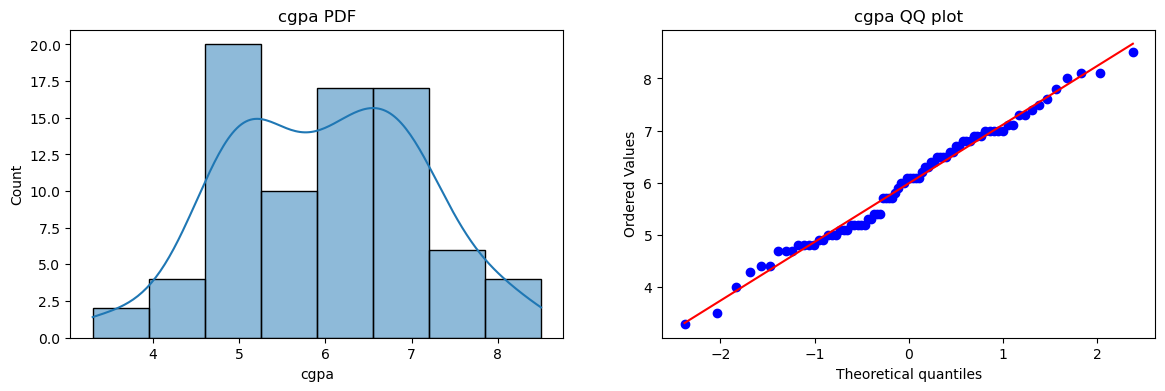

In [51]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(x_train['cgpa'], kde = True)
plt.title('cgpa PDF')

plt.subplot(122)
stats.probplot(x_train['cgpa'], dist = "norm", plot = plt)
plt.title('cgpa QQ plot')

Text(0.5, 1.0, 'iq QQ plot')

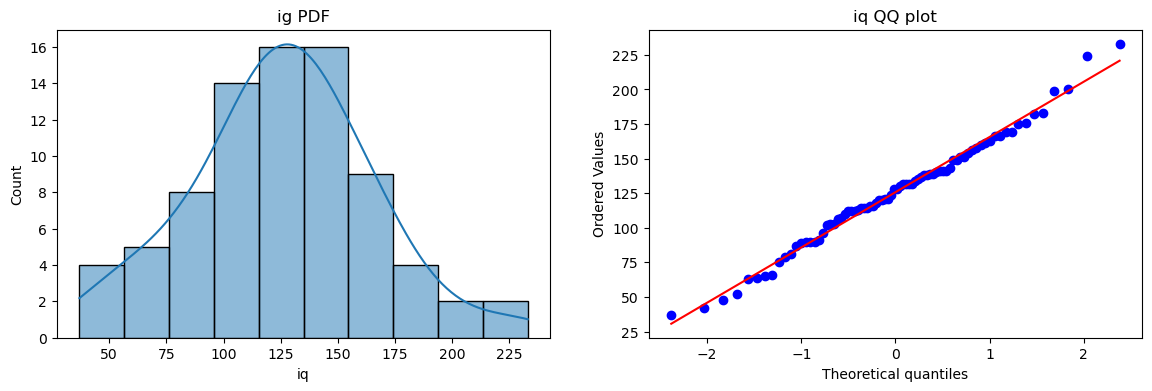

In [53]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(x_train['iq'], kde = True)
plt.title('ig PDF')

plt.subplot(122)
stats.probplot(x_train['iq'], dist = "norm", plot = plt)
plt.title('iq QQ plot')

In [55]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [69]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.85
Accuracy DT 0.85


In [71]:
trf = FunctionTransformer(func = np.log1p)


In [73]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [83]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

# x_test_transformed = x_test
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.5
Accuracy DT 0.5
